In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data_dir = "C:/Users/Hp/GITHUB/Face-Recognition/"  # Replace with the path to your dataset directory
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(data_dir + '/Train',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(data_dir + '/Test',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=100,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // val_generator.batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print('Test Accuracy:', accuracy)

# Predict on a test image
test_img = "C:/Users/Hp/GITHUB/Face-Recognition/Test/4/21.jpeg"
test_image = tf.keras.preprocessing.image.load_img(test_img , target_size=(64, 64))  # Replace with the path to your test image
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

predicted_label = np.argmax(model.predict(test_image))
print('Predicted Label:', predicted_label)

# Generate confusion matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


Found 120 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Epoch 1/100
3/3 [==============================] - 1s 166ms/step - loss: 2.1582 - accuracy: 0.1562
Epoch 2/100
3/3 [==============================] - 0s 133ms/step - loss: 2.1119 - accuracy: 0.1458
Epoch 3/100
3/3 [==============================] - 0s 143ms/step - loss: 1.8437 - accuracy: 0.1705
Epoch 4/100
3/3 [==============================] - 0s 143ms/step - loss: 1.7453 - accuracy: 0.2386
Epoch 5/100
3/3 [==============================] - 0s 134ms/step - loss: 1.7753 - accuracy: 0.2604
Epoch 6/100
3/3 [==============================] - 0s 128ms/step - loss: 1.7672 - accuracy: 0.2614
Epoch 7/100
3/3 [==============================] - 0s 117ms/step - loss: 1.7677 - accuracy: 0.3182
Epoch 8/100
3/3 [==============================] - 0s 140ms/step - loss: 1.7481 - accuracy: 0.3409
Epoch 9/100
3/3 [==============================] - 0s 132ms/step - loss: 1.7484 - accuracy: 0.2614
Epoch 10/100
3/3 [==========

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [2]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# # accuracy = accuracy_score(y_true, y_pred)
# # print("Accuarcy score: ", accuracy)
# print()
# print("Classification Report: \n", classification_report(y_true, y_pred))
# print()
# con_mat = confusion_matrix(y_true, y_pred)
# print("Confusion Matrix : \n", con_mat)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [4]:
# classes = np.unique(np.array(y_true))

# plt.imshow(con_mat, interpolation='nearest', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xticks(range(len(classes)), classes)
# plt.yticks(range(len(classes)), classes)
# plt.show()

NameError: name 'con_mat' is not defined

In [ ]:
# # Plot the confusion matrix using Seaborn
# sns.heatmap(con_mat, annot=True, fmt="d")
# plt.show()

In [1]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''

# Specifying the folder where images are present
TrainingImagePath='C:/Users/Hp/GITHUB/Face-Recognition/Train'
TestingImagePath='C:/Users/Hp/GITHUB/Face-Recognition/Test'

from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices

Found 120 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [2]:
'''############ Creating lookup table for all faces ############'''
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}

 The Number of output neurons:  6


In [4]:
'''######################## Create CNN deep learning model ########################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
classifier.fit_generator(
                    training_set,
#                     steps_per_epoch=30,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

C:\Users\Hp\AppData\Local\Temp/ipykernel_21376/4135105963.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
4/4 [==============================] - 1s 261ms/step - loss: 133.8336 - accuracy: 0.1250 - val_loss: 24.9656 - val_accuracy: 0.1667
Epoch 2/10
4/4 [==============================] - 1s 144ms/step - loss: 8.3766 - accuracy: 0.2417
Epoch 3/10
4/4 [==============================] - 1s 184ms/step - loss: 1.7262 - accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 1s 155ms/step - loss: 1.6857 - accuracy: 0.2833
Epoch 5/10
4/4 [==============================] - 1s 152ms/step - loss: 1.5971 - accuracy: 0.3750
Epoch 6/10
4/4 [==============================] - 1s 144ms/step - loss: 1.4235 - accuracy: 0.4583
Epoch 7/10
4/4 [==============================] - 1s 152ms/step - loss: 1.3949 - accuracy: 0.3833
Epoch 8/10
4/4 [==============================] - 1s 149ms/step - loss: 1.0343 - accuracy: 0.5917
Epoch 9/10
4/4 [==============================] - 1s 137ms/step - loss: 0.9339 - accuracy: 0.6250
Epoch 10/10
4/4 [==============================] - 1s 156ms/step - loss: 

In [5]:
'''########### Making single predictions ###########'''
import numpy as np
from keras.preprocessing import image

ImagePath='C:/Users/Hp/GITHUB/Face-Recognition/Test/4/21.jpeg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  4


In [15]:
actual = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
pred = []

In [16]:
for i in range(6):
    for j in range(21,26):
        if i == 3 and j == 23:
            pred.append(3)
            continue
        ImagePath="C:/Users/Hp/GITHUB/Face-Recognition/Test/" +str(i) + "/" + str(j) + ".jpeg"
        test_image=image.load_img(ImagePath,target_size=(64, 64))
        test_image=image.img_to_array(test_image)

        test_image=np.expand_dims(test_image,axis=0)

        result=classifier.predict(test_image,verbose=0)
        pred.append(ResultMap[np.argmax(result)])

In [17]:
pred = [int(x) for x in pred]
print(pred)

[4, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 5, 1, 3, 1, 3, 4, 5, 0, 0, 4, 4, 5, 4, 5, 2]


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lbph_accuracy = accuracy_score(actual, pred)
print("Accuarcy score: ", lbph_accuracy)
print()
print("Classification Report: \n", classification_report(actual, pred))
print()
con_mat = confusion_matrix(actual, pred)
print("Confusion Matrix : \n", con_mat)

Accuarcy score:  0.9

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       1.00      0.80      0.89         5
           5       0.71      1.00      0.83         5

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30


Confusion Matrix : 
 [[4 1 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 4 0 1]
 [0 0 0 0 4 1]
 [0 0 0 0 0 5]]


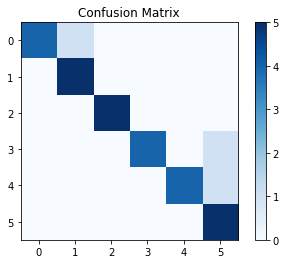

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
classes = np.unique(np.array(actual))

plt.imshow(con_mat, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(classes)), classes)
plt.yticks(range(len(classes)), classes)
plt.show()

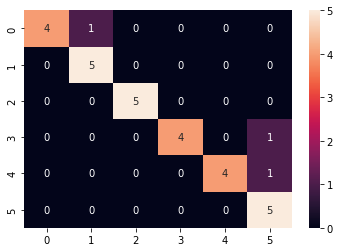

In [27]:
# Plot the confusion matrix using Seaborn
sns.heatmap(con_mat, annot=True, fmt="d")
plt.show()

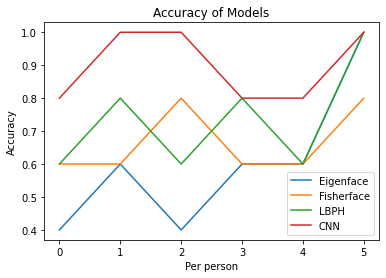

In [36]:
mat = [0.8, 1.0, 1.0, 0.8, 0.8, 1.0]
eigenface = [0.4, 0.6, 0.4, 0.6, 0.6, 1.0]
fisherface = [0.6, 0.6, 0.8, 0.6, 0.6, 0.8 ]
lbph = [0.6, 0.8, 0.6, 0.8, 0.6, 1.0]

# Plot the accuracy of each model
plt.plot(eigenface, label='Eigenface')
plt.plot(fisherface, label='Fisherface')
plt.plot(lbph, label='LBPH')
plt.plot(mat, label='CNN')

# Add labels and title
plt.xlabel('Per person')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.legend()

plt.show()